In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import functions as f
import sys
#sys.path.append("/Volumes/pdoubraw-1/repos/")
sys.path.append("C:/Users/krydalch/Documents/Repos/")
from datatools import wfip2
from datatools.remote_sensing import scintec_profiler

# Import SODAR Data

In [5]:
sodar_path = "/Volumes/pdoubraw-1/repos/jet/data/"
sodar_path = "C:\\Users\\krydalch\\Desktop\\Mast Data Analysis\\SODAR\\"
sodar_path = "C:\\Users\\krydalch\\Desktop\\MetMastData\\SODAR\\"

In [6]:
df = wfip2.read_dir(dpath=sodar_path, reader=scintec_profiler, ext='mnd')
df = df.set_index("datetime")
df.head()

,height,wind speed,wind direction,wind W,sigma W,backscatter,error code
datetime,,,,,,,
2017-02-17,30.0,5.26,188.7,0.00,0.16,1.04E+06,0
2017-02-17,40.0,6.46,188.0,0.13,0.16,7.22E+05,0
2017-02-17,50.0,7.25,186.9,0.06,0.16,1.27E+06,0
2017-02-17,60.0,7.55,188.7,0.11,0.17,7.10E+05,0
2017-02-17,70.0,7.98,189.6,0.07,0.19,4.18E+05,0


In [7]:
time_vs_height = df[["wind speed","height"]].reset_index().set_index(["datetime","height"]).unstack().astype("float")
time_vs_height.index = time_vs_height.index.tz_localize("UTC")

# Import Sonic Data: Wind Direction

In [11]:
df_sonic = pd.read_csv("Wind_Direction_10min_mean.csv",index_col=[0],parse_dates=True)
df_test = pd.read_csv("sonic_ws_10min_mean.csv",index_col=[0],parse_dates=True)

In [12]:
df_test.head()

,0.9,2.4,4.0,10.1,16.8,47.2,116.4,158.2,200.0
2017-02-17 00:00:00+00:00,1.760506,2.085837,2.065484,2.482960,3.096731,4.259617,6.951333,7.622561,10.192081
2017-02-17 00:10:00+00:00,1.488232,1.764777,1.759977,2.315117,2.915626,4.179341,5.957020,6.734694,9.236851
2017-02-17 00:20:00+00:00,1.345313,1.587843,1.562011,2.217619,2.635905,3.695483,5.230997,5.939940,8.363798
2017-02-17 00:30:00+00:00,1.359829,1.632719,1.597804,2.328974,2.699088,3.879017,6.534010,8.034880,10.702627
2017-02-17 00:40:00+00:00,1.243604,1.538192,1.524335,2.259734,2.731474,4.250431,7.416316,8.817852,12.104825


## Filter SODAR of False Data

In [20]:
#sodar.keys()
sodar = df[df.height==height]["wind direction"].astype("float").copy()
sodar[sodar>360] = np.nan



In [31]:
pd.Timestamp("2017-02-17 00:10:00")

Timestamp('2017-02-17 00:10:00')

In [34]:
sodar.index

DatetimeIndex(['2017-02-17 00:00:00', '2017-02-17 00:10:00',
               '2017-02-17 00:20:00', '2017-02-17 00:30:00',
               '2017-02-17 00:40:00', '2017-02-17 00:50:00',
               '2017-02-17 01:00:00', '2017-02-17 01:10:00',
               '2017-02-17 01:20:00', '2017-02-17 01:30:00',
               ...
               '2017-02-17 22:20:00', '2017-02-17 22:30:00',
               '2017-02-17 22:40:00', '2017-02-17 22:50:00',
               '2017-02-17 23:00:00', '2017-02-17 23:10:00',
               '2017-02-17 23:20:00', '2017-02-17 23:30:00',
               '2017-02-17 23:40:00', '2017-02-17 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=144, freq=None)

Text(0.5, 1.0, 'Wind Direction for SODAR and Sonic Data')

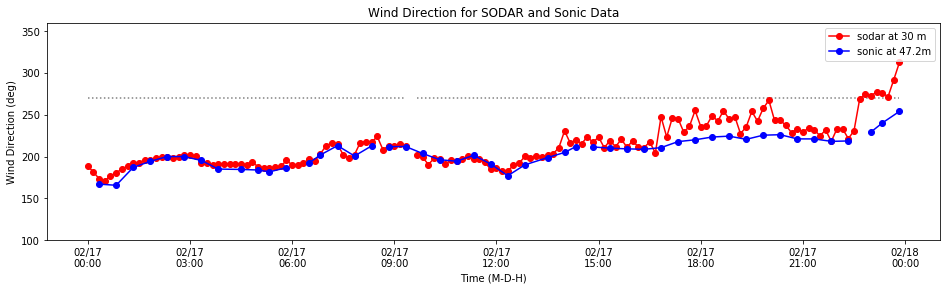

In [40]:
height = 30
h_sonic = "47.2"
list_of_datetimes = {}

fig  = plt.figure(figsize=(16,4))
ax   = fig.add_subplot(111)

idx1 = pd.Timestamp("2017-02-17 00:10:00")
idx2 = pd.Timestamp("2017-02-17 23:50:00")

idx3 = (2*30.5+17)*24
idx4 = idx3 + 24
list_of_datetimes = [idx1 , idx2]


# ax.axhline(y=270.0,xmin =idx3, xmax =idx4 ,  color='gray', linestyle=":")

ax.plot(sodar.index, sodar.values*0.0+270, color='grey', linestyle=":")

ax.plot(sodar,'-or',label="sodar at {0:.0f} m".format(height))
ax.plot(df_sonic["47.2"],'-ob', label="sonic at {0}m".format(h_sonic))
#ax.plot_date(list_of_datetimes, [270, 270])


ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%H:%M'))   
ax.set_xlabel("Time (M-D-H)")
ax.set_ylabel("Wind Direction (deg)")
ax.set_ylim([100,360])
#ax.set_xlim([time_vs_height.index[0], time_vs_height.index[-1]])
ax.set_title("Wind Direction for SODAR and Sonic Data")

In [36]:
sodar.index

DatetimeIndex(['2017-02-17 00:00:00', '2017-02-17 00:10:00',
               '2017-02-17 00:20:00', '2017-02-17 00:30:00',
               '2017-02-17 00:40:00', '2017-02-17 00:50:00',
               '2017-02-17 01:00:00', '2017-02-17 01:10:00',
               '2017-02-17 01:20:00', '2017-02-17 01:30:00',
               ...
               '2017-02-17 22:20:00', '2017-02-17 22:30:00',
               '2017-02-17 22:40:00', '2017-02-17 22:50:00',
               '2017-02-17 23:00:00', '2017-02-17 23:10:00',
               '2017-02-17 23:20:00', '2017-02-17 23:30:00',
               '2017-02-17 23:40:00', '2017-02-17 23:50:00'],
              dtype='datetime64[ns]', name='datetime', length=144, freq=None)

## TEST TO SEE IF PSD SPIKE IS DUE TO TOWER WAKE

#### Import SONIC

In [10]:
path_to_csvs   = "C:\\Users\\krydalch\\Desktop\\MetMastData\\TTU tall tower\\"
start_time = '14:10:00'
end_time = '14:40:00'
master_df = f.get_sonic_met_dat(path_to_csvs, start_time ,end_time)
#series = master_df[116.4]


------------------
Starting Master Function
group 1 out of 4
group 2 out of 4
group 3 out of 4
group 4 out of 4
Creating Final DataFrame
DONE!
------------------


In [12]:
df_sonic = master_df[116.4]['Theta']

In [11]:
master_df.head()

0.9                                  \
                                     Theta         U         V         W   
2017-02-17 14:10:00+00:00        -0.172218  3.409230 -0.010247  0.144377   
2017-02-17 14:10:00.020000+00:00  0.216358  3.350135  0.012651  0.094543   
2017-02-17 14:10:00.040000+00:00 -0.320293  3.349155 -0.018723  0.133463   
2017-02-17 14:10:00.060000+00:00 -2.079489  3.217070 -0.116811  0.148705   
2017-02-17 14:10:00.080000+00:00 -0.485118  3.188595 -0.026998  0.171568   

                                      2.4                                  \
                                      Theta         U         V         W   
2017-02-17 14:10:00+00:00        -11.422278  4.688723 -0.947310 -0.016773   
2017-02-17 14:10:00.020000+00:00 -10.904301  4.758255 -0.916666 -0.011646   
2017-02-17 14:10:00.040000+00:00 -12.876102  4.974899 -1.137220  0.084899   
2017-02-17 14:10:00.060000+00:00 -16.881008  4.992759 -1.515109  0.014319   
2017-02-17 14:10:00.080000+00:00 -18.631293  4.919048 -1.658434  0.095710   

                                     4.0              ...     116.4            \
                                     Theta         U  ...         V         W   
2017-02-17 14:10:00+00:00        -5.907489  5.450369  ...  0.093244 -0.214669   
2017-02-17 14:10:00.020000+00:00 -3.185907  5.460826  ...  0.054183 -0.198884   
2017-02-17 14:10:00.040000+00:00 -3.305566  5.420448  ...  0.066707 -0.250089   
2017-02-17 14:10:00.060000+00:00 -4.583426  5.422485  ...  0.053517 -0.238468   
2017-02-17 14:10:00.080000+00:00 -3.399471  5.358570  ...  0.115154 -0.205762   

                                     158.2                                 \
                                     Theta          U         V         W   
2017-02-17 14:10:00+00:00        -1.240477  16.439919 -0.355987 -0.154713   
2017-02-17 14:10:00.020000+00:00 -1.346035  16.473617 -0.387082 -0.137464   
2017-02-17 14:10:00.040000+00:00 -1.584350  16.487531 -0.456031 -0.149806   
2017-02-17 14:10:00.060000+00:00 -2.226066  16.483192 -0.640730 -0.103250   
2017-02-17 14:10:00.080000+00:00 -1.359861  16.517958 -0.392112 -0.140399   

                                     200.0                                 
                                     Theta          U         V         W  
2017-02-17 14:10:00+00:00         0.558174  15.606792  0.152046 -0.062699  
2017-02-17 14:10:00.020000+00:00  0.546536  15.448091  0.147362 -0.163655  
2017-02-17 14:10:00.040000+00:00 -0.624572  15.480619 -0.168759 -0.160500  
2017-02-17 14:10:00.060000+00:00  0.686488  15.543803  0.186247 -0.138612  
2017-02-17 14:10:00.080000+00:00  0.360821  15.446143  0.097273 -0.154307  

[5 rows x 36 columns]

In [19]:
height = 120.0
sodar = df[df.height==height]["wind direction"].astype("float").copy()
sodar[sodar>360] = np.nan
sodar = sodar["2017-02-17 14:10:00":"2017-02-17 14:40:00"]

#sodar.head()

Text(0.5, 1.0, 'Wind Direction for SODAR and Sonic Data')

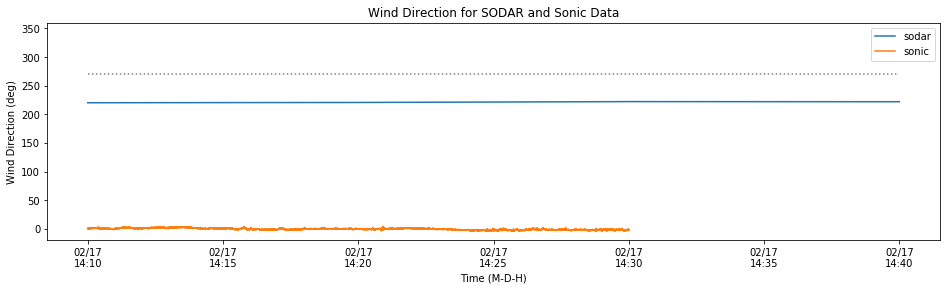

In [22]:
height = 120
h_sonic = "47.2"
list_of_datetimes = {}

fig  = plt.figure(figsize=(16,4))
ax   = fig.add_subplot(111)

# ax.axhline(y=270.0,xmin =idx3, xmax =idx4 ,  color='gray', linestyle=":")

ax.plot(sodar.index, sodar.values*0.0+270, color='grey', linestyle=":")

ax.plot(sodar,label="sodar")
ax.plot(df_sonic, label="sonic")
#ax.plot_date(list_of_datetimes, [270, 270])


ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%H:%M'))   
ax.set_xlabel("Time (M-D-H)")
ax.set_ylabel("Wind Direction (deg)")
ax.set_ylim([-20,360])
#ax.set_xlim([time_vs_height.index[0], time_vs_height.index[-1]])
ax.set_title("Wind Direction for SODAR and Sonic Data")